## Hypothesis Tests in Python
In this assessment, you will look at data from a study on toddler sleep habits. 

The hypothesis tests you create and the questions you answer in this Jupyter notebook will be used to answer questions in the following graded assignment.

In [40]:
import numpy as np
import pandas as pd
from scipy.stats import (t, norm, ttest_ind)
import matplotlib.pyplot as plt

Your goal is to analyse data which is the result of a study that examined
differences in a number of sleep variables between napping and non-napping toddlers. Some of these
sleep variables included: Bedtime (lights-off time in decimalized time), Night Sleep Onset Time (in
decimalized time), Wake Time (sleep end time in decimalized time), Night Sleep Duration (interval
between sleep onset and sleep end in minutes), and Total 24-Hour Sleep Duration (in minutes). Note:
[Decimalized time](https://en.wikipedia.org/wiki/Decimal_time) is the representation of the time of day using units which are decimally related.   


The 20 study participants were healthy, normally developing toddlers with no sleep or behavioral
problems. These children were categorized as napping or non-napping based upon parental report of
children’s habitual sleep patterns. Researchers then verified napping status with data from actigraphy (a
non-invasive method of monitoring human rest/activity cycles by wearing of a sensor on the wrist) and
sleep diaries during the 5 days before the study assessments were made.


You are specifically interested in the results for the Bedtime and Total 24-Hour Sleep Duration. 

Reference: Akacem LD, Simpkin CT, Carskadon MA, Wright KP Jr, Jenni OG, Achermann P, et al. (2015) The Timing of the Circadian Clock and Sleep Differ between Napping and Non-Napping Toddlers. PLoS ONE 10(4): e0125181. https://doi.org/10.1371/journal.pone.0125181

In [18]:
df = pd.read_csv("../data/nap_no_nap.csv", usecols = ["napping", "24 h sleep duration", "night bedtime"]) 

In [19]:
df.head()

,napping,night bedtime,24 h sleep duration
0,0,20.45,629.4
1,0,19.23,672.4
2,0,19.60,628.8
3,0,19.46,766.6
4,0,19.21,678.0


In [20]:
df.columns

Index(['napping', 'night bedtime', '24 h sleep duration'], dtype='object')

In [21]:
df.shape

(20, 3)

In [22]:
df.napping.sum()

15

**Question**: What value is used in the column 'napping' to indicate a toddler takes a nap? (see reference article) 

**Questions**: What is the overall sample size $n$? What are the sample sizes of napping and non-napping toddlers?

In [23]:
# napping = 1
# non-napping = 0

# sample size  = 20
# napping toddlers = 15, non-napping toddlers = 5

## Hypothesis tests
We will look at two hypothesis test, each with $\alpha = .05$:  


# 1. Is the average bedtime for toddlers who nap later than the average bedtime for toddlers who don't nap?


### $$H_0: \mu_{nap}=\mu_{no\ nap}, \ H_a:\mu_{nap}>\mu_{no\ nap}$$
Or equivalently:
### $$H_0: \mu_{nap}-\mu_{no\ nap}=0, \ H_a:\mu_{nap}-\mu_{no\ nap}>0$$


# 2. The average 24 h sleep duration (in minutes) for napping toddlers is different from toddlers who don't nap.


### $$H_0: \mu_{nap}=\mu_{no\ nap}, \ H_a:\mu_{nap}\neq\mu_{no\ nap}$$
Or equivalently:
### $$H_0: \mu_{nap}-\mu_{no\ nap}=0, \ H_a:\mu_{nap}-\mu_{no\ nap} \neq 0$$

First isolate `night bedtime` into two variables - one for toddlers who nap and one for toddlers who do not nap.

In [24]:
nap_bedtime = df["night bedtime"][df.napping == 1]

In [25]:
no_nap_bedtime = df["night bedtime"][df.napping == 0]

Now find the sample mean bedtime for nap and no_nap.

In [26]:
nap_mean_bedtime = nap_bedtime.mean()
no_nap_mean_bedtime = no_nap_bedtime.mean()

In [27]:
nap_mean_bedtime, no_nap_mean_bedtime

(20.304, 19.590000000000003)

**Question**: What is the sample difference of mean bedtime for nappers minus no nappers?

In [28]:
mean_bedtime_diff = nap_mean_bedtime - no_nap_mean_bedtime
mean_bedtime_diff

0.7139999999999951

Now find the sample standard deviation for $X_{nap}$ and $X_{no\ nap}$.

In [33]:
# Since the standard deviations are closer, we'll use the pooled approach.

nap_s_bedtime = nap_bedtime.std()
no_nap_s_bedtime = no_nap_bedtime.std()

In [30]:
nap_s_bedtime, no_nap_s_bedtime

(0.5910619981984009, 0.5075923561284187)

**Question**: What is the s.e.$(\bar{X}_{nap} - \bar{X}_{no\ nap})$?

We expect the variance in sleep time for toddlers who nap and toddlers who don't nap to be the same. So we use a pooled standard error.

Calculate the pooled standard error of $\bar{X}_{nap} - \bar{X}_{no\ nap}$ using the formula below.

# $s.e.(\bar{X}_{nap} - \bar{X}_{no\ nap}) = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}(\frac{1}{n_1}+\frac{1}{n_2})}$

In [31]:
pooled_se = np.sqrt((((nap_bedtime.size - 1) * nap_bedtime.var()) + ((no_nap_bedtime.size - 1) * no_nap_bedtime.var())) * \
                    ((1 / nap_bedtime.size) + (1 / no_nap_bedtime.size)) / (nap_bedtime.size + no_nap_bedtime.size - 2))
pooled_se

0.2961871280370147

**Question**: Given our sample size of $n$, how many degrees of freedom ($df$) are there for the associated $t$ distribution?

# $s.e._{pooled}(\bar{X}_{nap} - \bar{X}_{no\ nap}) = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}(\frac{1}{n_1}+\frac{1}{n_2})}$

In [32]:
df_pooled = nap_bedtime.size + no_nap_bedtime.size - 2
df_pooled

18

### Now calculate the $t$-test statistic for our __first hypothesis test__ using  
* pooled s.e.($\bar{X}_{nap} - \bar{X}_{no\ nap}$)  
* $\bar{X}_{nap} - \bar{X}_{no\ nap}$  
* $\mu_{0,\ nap} - \mu_{0,\ no\ nap}=0$, the population difference in means under the null hypothesis

In [34]:
tstat = (mean_bedtime_diff - 0) / pooled_se
tstat

2.4106381824626966

**Question**: What is the p-value for the first hypothesis test?

For a discussion of probability density functions (PDF) and cumulative distribution functions (CDF) see:

https://integratedmlai.com/normal-distribution-an-introductory-guide-to-pdf-and-cdf/

To find the p-value, we can use the CDF for the t-distribution:
```
t.cdf(tstat, df)
```
Which for $X \sim t(df)$ returns $P(X \leq tstat)$.

Because of the symmetry of the $t$ distribution, we have that 
```
1 - t.cdf(tstat, df)
```
returns $P(X > tstat)$

The function `t.cdf(tstat, df)` will give you the same value as finding the one-tailed probability of `tstat` on a t-table with the specified degrees of freedom.

Use the function `t.cdf(tstat, df)` to find the p-value for the first hypothesis test.

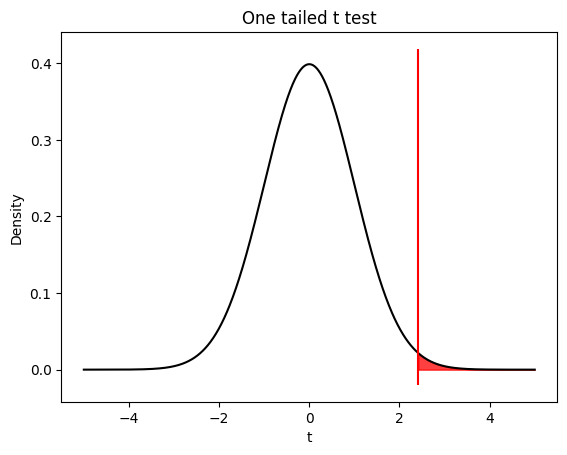

In [44]:
x = np.linspace(start = -5, stop = 5, num = 1000, endpoint = True)
tpdfs = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
axes.plot(x, tpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines(tstat, ymax = ymax, ymin = ymin, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = tpdfs, where = (x >= abs(tstat)), color = "red", alpha = 0.75)
axes.set_ylabel("Density")
axes.set_xlabel("t")
axes.set_title("One tailed t test")
plt.show()

In [45]:
pvalue = (1 - t.cdf(tstat , df = df_pooled))
pvalue

0.013417041438843036

**Question**: What are the t-statistic and p-value for the second hypothesis test?

Calculate the $t$ test statistics and corresponding p-value using the `scipy` function `scipy.stats.ttest_ind(a, b, equal_var=True)` and check with your answer. 

In [46]:
pvalue = 2 * (1 - t.cdf(tstat , df = df_pooled))
pvalue

0.026834082877686072

In [48]:
ttest_ind(nap_bedtime, no_nap_bedtime, equal_var = True, alternative = "greater")

TtestResult(statistic=2.4106381824626966, pvalue=0.013417041438843019, df=18.0)

In [47]:
# The p values (for both the first and second hypothesis tests) are less than the significance level 0.05
# In both cases, we can reject the Null hypothesis.
# So, there's enough evidence to assert that the bedtime of napping toodlers and that of non-napping toddlers are not the same.

**Question**: Does `scipy.stats.ttest_ind` return values for a one-sided or two-sided test?

In [42]:
# Two tailed ;&)

**Question**: Can you think of a way to recover the results you got using `1-t.cdf` from the p-value given by `scipy.stats.ttest_ind`?

Use the `scipy` function `scipy.stats.ttest_ind(a, b, equal_var=True)` to find the $t$ test statistic and corresponding p-value for the second hypothesis test.

In [49]:
ttest_ind(nap_bedtime, no_nap_bedtime, equal_var = True, alternative = "two-sided")

TtestResult(statistic=2.4106381824626966, pvalue=0.026834082877686037, df=18.0)

**Question**: For the $\alpha=.05$, do you reject or fail to reject the first hypothesis?

**Question**: For the $\alpha=.05$, do you reject or fail to reject the second hypothesis?

In [ ]:
# We'll reject both Null hypotheses.